# SVM Classifier Challenge

For this challenge, we'll use the epicurious dataset, which has a collection of recipes, key terms and ingredients, and their ratings. This challenge builds on the guided example in lesson 3.4.4.

What we want to see is if we can use the ingredient and keyword list to predict the rating. For someone writing a cookbook this could be really useful information that could help them choose which recipes to include because they're more likely to be enjoyed and therefore make the book more likely to be successful.

First let's load the dataset. It's [available on Kaggle](https://www.kaggle.com/hugodarwood/epirecipes). We'll use the csv file here and as pull out column names and some summary statistics for ratings.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVR


from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


%matplotlib inline

In [2]:
raw_data = pd.read_csv('/Users/teresaoneill/Dropbox/Thinkful/Datasets/epi_r.csv')

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [4]:
for col in raw_data.columns:
    print(raw_data[col].describe())

count             20052
unique            17736
top       Pastry Dough 
freq                 28
Name: title, dtype: object
count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64
count    1.593500e+04
mean     6.322958e+03
std      3.590460e+05
min      0.000000e+00
25%      1.980000e+02
50%      3.310000e+02
75%      5.860000e+02
max      3.011122e+07
Name: calories, dtype: float64
count     15890.000000
mean        100.160793
std        3840.318527
min           0.000000
25%           3.000000
50%           8.000000
75%          27.000000
max      236489.000000
Name: protein, dtype: float64
count    1.586900e+04
mean     3.468775e+02
std      2.045611e+04
min      0.000000e+00
25%      7.000000e+00
50%      1.700000e+01
75%      3.300000e+01
max      1.722763e+06
Name: fat, dtype: float64
count    1.593300e+04
mean     6.225975e+03
std  

count    20052.000000
mean         0.000598
std          0.024456
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: brie, dtype: float64
count    20052.000000
mean         0.001795
std          0.042334
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: brine, dtype: float64
count    20052.000000
mean         0.001895
std          0.043492
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: brisket, dtype: float64
count    20052.000000
mean         0.006084
std          0.077765
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: broccoli, dtype: float64
count    20052.000000
mean         0.002394
std          0.048869
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name

count    20052.000000
mean         0.001546
std          0.039290
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: collard greens, dtype: float64
count    20052.000000
mean         0.000798
std          0.028237
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: colorado, dtype: float64
count    20052.000000
mean         0.000150
std          0.012231
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: columbus, dtype: float64
count    20052.000000
mean         0.004788
std          0.069028
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: condiment, dtype: float64
count    20052.000000
mean         0.046080
std          0.209664
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        

count    20052.000000
mean         0.018751
std          0.135649
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: fourth of july, dtype: float64
count    20052.000000
mean         0.000648
std          0.025454
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: france, dtype: float64
count    20052.000000
mean         0.001147
std          0.033849
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: frangelico, dtype: float64
count    20052.000000
mean         0.000050
std          0.007062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: frankenrecipe, dtype: float64
count    20052.000000
mean         0.020796
std          0.142704
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max    

count    20052.000000
mean         0.000698
std          0.026415
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: ireland, dtype: float64
count    20052.000000
mean         0.000100
std          0.009987
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: israel, dtype: float64
count    20052.000000
mean         0.000299
std          0.017296
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: italy, dtype: float64
count    20052.000000
mean         0.018003
std          0.132966
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: jalapeño, dtype: float64
count    20052.000000
mean         0.007929
std          0.088696
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Na

count    20052.000000
mean         0.000399
std          0.019971
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: meatball, dtype: float64
count    20052.000000
mean         0.000100
std          0.009987
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: meatloaf, dtype: float64
count    20052.000000
mean         0.003092
std          0.055521
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: melon, dtype: float64
count    20052.000000
mean         0.000249
std          0.015789
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: mexico, dtype: float64
count    20052.000000
mean         0.000050
std          0.007062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
N

count    20052.000000
mean         0.009126
std          0.095097
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: passover, dtype: float64
count    20052.000000
mean         0.048274
std          0.214351
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: pasta, dtype: float64
count    20052.000000
mean         0.000598
std          0.024456
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: pasta maker, dtype: float64
count    20052.000000
mean         0.004937
std          0.070093
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: pastry, dtype: float64
count    20052.000000
mean         0.010523
std          0.102041
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.00000

count    20052.000000
mean         0.003391
std          0.058136
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: rosh hashanah/yom kippur, dtype: float64
count    20052.000000
mean         0.000199
std          0.014123
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: rosé, dtype: float64
count    20052.000000
mean         0.000150
std          0.012231
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: rub, dtype: float64
count    20052.000000
mean         0.016507
std          0.127418
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: rum, dtype: float64
count    20052.000000
mean         0.002194
std          0.046793
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.0

count    20052.000000
mean         0.015510
std          0.123571
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: super bowl, dtype: float64
count    20052.000000
mean         0.000050
std          0.007062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: suzanne goin, dtype: float64
count    20052.000000
mean         0.014263
std          0.118576
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: sweet potato/yam, dtype: float64
count    20052.000000
mean         0.003690
std          0.060638
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: swiss cheese, dtype: float64
count    20052.000000
mean         0.000199
std          0.014123
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000


Name: snack, dtype: float64
count    20052.000000
mean         0.000948
std          0.030768
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: snack week, dtype: float64
count    20052.000000
mean         0.022741
std          0.149080
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: turkey, dtype: float64


We learn a few things from this analysis. From a ratings perspective, there are just over 20,000 recipes with an average rating of 3.71. What is interesting is that the 25th percentile is actually above the mean. This means there is likely some kind of outlier population. This makes sense when we think about reviews: some bad recipes may have very few very low reviews.

Let's validate the idea a bit further with a histogram.

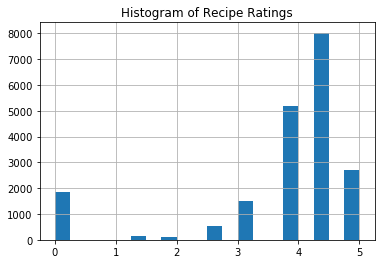

In [5]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

So a few things are shown in this histogram. Firstly there are sharp discontinutities. We don't have continuous data. No recipe has a 3.5 rating, for example. Also we see the anticipated increase at 0.

In [6]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

What we can see right away is that nutrition information is not available for all goods. Now this would be an interesting data point, but let's focus on ingredients and keywords right now. So we'll actually drop the whole columns for calories, protein, fat, and sodium. We'll come back to nutrition information later.

## Preparing the data for modeling

First, let's binarize the outcome variable to prepare to run a classifier model.

In [7]:
#Binarize the outcome variable.
raw_data['rating_bin'] = np.where(raw_data['rating']>=4, 1, 0)
raw_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,rating_bin
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### Tune and cross-validate SVC models

We'll start by dividing the data into train and test sets (80/20 split); then we will use 5-fold cross-validation on the training data to tune the hyperparameters of SVC models, further validating each on the test data. A grid search strategy will be used to tune the hyperparameters. 

In [8]:
X = raw_data.drop(['rating', 'rating_bin', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data['rating_bin']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [9]:
## Define a function to run a grid search to tune hyperparameters
## for a linear SVC
def svc_run(X_train, y_train, c, pen):
    svc = LinearSVC(C=c, penalty=pen, dual=False, random_state=10)
    svc.fit(X_train, y_train)
    print('SCV results:\n')
    print('Regularization: ', pen, ' = ', c)
    print('Accuracy, 5 folds: ', cross_val_score(svc, X_train, y_train, cv=5))
    avg_score = cross_val_score(svc, X_train, y_train, cv=5).mean()
    print('Average CV score: ', avg_score)
    y_pred = svc.predict(X_train)
    print('Accuracy, test:\n ', classification_report(y_train, y_pred)) 

def linear_svc_tune(X_train, y_train, C=[1e-7, 1e-3, 0.1, 0.25, 0.5, 1, 100, 1000, 1e5]):
    penalties = ['l1','l2']
    for pen in penalties:
        for c in C:
            svc_run(X_train, y_train, c, pen)

In [10]:
linear_svc_tune(X_train, y_train)

SCV results:

Regularization:  l1  =  1e-07
Accuracy, 5 folds:  [ 0.46338423  0.46338423  0.46352868  0.46352868  0.4633614 ]
Average CV score:  0.46343744345
Accuracy, test:
               precision    recall  f1-score   support

          0       0.46      1.00      0.63      7434
          1       0.00      0.00      0.00      8607

avg / total       0.21      0.46      0.29     16041

SCV results:

Regularization:  l1  =  0.001


/Users/teresaoneill/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy, 5 folds:  [ 0.5515737   0.55406669  0.5632793   0.5542394   0.5575304 ]
Average CV score:  0.55613789838
Accuracy, test:
               precision    recall  f1-score   support

          0       0.53      0.37      0.44      7434
          1       0.57      0.72      0.64      8607

avg / total       0.55      0.56      0.54     16041

SCV results:

Regularization:  l1  =  0.1
Accuracy, 5 folds:  [ 0.59083827  0.61140542  0.59569825  0.59850374  0.60710945]
Average CV score:  0.600711026544
Accuracy, test:
               precision    recall  f1-score   support

          0       0.62      0.52      0.56      7434
          1       0.64      0.73      0.68      8607

avg / total       0.63      0.63      0.63     16041

SCV results:

Regularization:  l1  =  0.25
Accuracy, 5 folds:  [ 0.59052664  0.61171705  0.60317955  0.59725686  0.60492672]
Average CV score:  0.601521364279
Accuracy, test:
               precision    recall  f1-score   support

          0       0.63      0.

/Users/teresaoneill/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Regularization:  l2  =  0.001
Accuracy, 5 folds:  [ 0.58554067  0.60081022  0.59476309  0.59912718  0.59681946]
Average CV score:  0.595412123976
Accuracy, test:
               precision    recall  f1-score   support

          0       0.61      0.44      0.51      7434
          1       0.61      0.76      0.68      8607

avg / total       0.61      0.61      0.60     16041

SCV results:

Regularization:  l2  =  0.1
Accuracy, 5 folds:  [ 0.59052664  0.61078218  0.60317955  0.59569825  0.60898036]
Average CV score:  0.601833395981
Accuracy, test:
               precision    recall  f1-score   support

          0       0.63      0.55      0.59      7434
          1       0.65      0.72      0.68      8607

avg / total       0.64      0.64      0.64     16041

SCV results:

Regularization:  l2  =  0.25
Accuracy, 5 folds:  [ 0.59052664  0.60610782  0.60411471  0.59569825  0.60523854]
Average CV score:  0.600337194768
Accuracy, test:
               precision    recall  f1-score   support


With a linear kernel, the best combination of hyperparamters uses L1 regularization with an alpha of 0.25, which yields an overall accuracy of 60.15% in the training data over 5 folds. Precision and recall are both higher for positive reviews than for negative reviews. Let's run the model with and take a look at the coefficients.

In [15]:
lin_svc = LinearSVC(C=0.25, penalty='l1', dual=False, random_state=10)
lin_svc.fit(X_train, y_train)
co_dict = {'features': X_train.columns.values, 'coefficients': lin_svc.coef_[0]}
ranked_co = pd.DataFrame(data=co_dict)
ranked_co['coef_absolute'] = abs(ranked_co['coefficients'])
ranked_co = ranked_co.sort_values('coef_absolute', ascending=False)
print(ranked_co)

     coefficients                  features  coef_absolute
670     -0.910284                 leftovers       0.910284
471     -0.829989                pittsburgh       0.829989
318     -0.735502                 lancaster       0.735502
67      -0.662687                      brie       0.662687
69       0.588238                   brisket       0.588238
298     -0.572517                    jícama       0.572517
516     -0.569975              rhode island       0.569975
15      -0.552989                  aperitif       0.552989
539      0.548760                   sangria       0.548760
480     -0.528908                     poppy       0.528908
307     -0.508345                    kirsch       0.508345
224     -0.492665             friendsgiving       0.492665
58      -0.460807              bon app��tit       0.460807
287      0.449372                   indiana       0.449372
434     -0.444940                   pancake       0.444940
639     -0.443776                  vermouth       0.4437

Next, let's set up a SVC using an RBF kernel instead of a linear kernel. With a dataset of this size, running the RBF SVC was prohibitive in terms of computation cost, causing the kernel to freeze, so we will move on at this point to testing the linear SVC.

In [12]:
## Define a function to run a grid search to tune hyperparameters
## for an rbf SVC
def svc_run(X_train, y_train, c, gam):
    svc = SVC(C=c, gamma=gam, kernel='rbf', verbose=True)
    svc.fit(X_train, y_train)   
    print('SCV results:\n')
    print('Regularization: ', c)
    print('Gamma: ', gam)
    print('Accuracy, 5 folds: ', cross_val_score(svc, X_train, y_train, cv=5))
    avg_score = cross_val_score(svc, X_train, y_train, cv=5).mean()
    print('Average CV score: ', avg_score)
    y_pred = svc.predict(X_train)
    print('Accuracy, test:\n ', classification_report(y_train, y_pred)) 

def rbf_svc_tune(X_train, 
                 y_train, 
                 C = [1e-7, 1e-3, 0.1, 0.5, 1, 100],
                 gamma = [0.1, 0.3, 0.5, 1.0]):
    for gam in gamma:
        for c in C:
            svc_run(X_train, y_train, c, gam)

In [13]:
#rbf_svc_tune(X_train, y_train)

We'll inspect the results of the RBF SVC cross-validation and report on the best iteration once it's debugged. 

Now that we have our tuned hyperparameters, let's use lin_svc, which we fitted above, and see how it fares with the test data.

In [14]:
y_pred = lin_svc.predict(X_test)
print('Accuracy, test:\n ', classification_report(y_test, y_pred))

Accuracy, test:
               precision    recall  f1-score   support

          0       0.58      0.48      0.53      1880
          1       0.60      0.69      0.64      2131

avg / total       0.59      0.59      0.59      4011



## Bias in the dataset

As the lesson points out, the sample of reviewers is heavily biased: people choose to prepare recipes based on cuisines, ingredients, and cooking styles that they like, so the sample is generally biased toward positive reviews. 

In general, reviews are biased toward the extremes: people are more likely to give polarized reviews, because people in the middle may not feel strongly enough to provide feedback. We can observe in this dataset, for example, that there are no 3.5 ratings at all.

Something interesting and indicative of potential sampling bias also emerges in the coefficients of the LinearSVC, which is that among the features with higher absolute coefficients are ingredients and keywords associated with holidays, e.g., the Jewish holidays of Shavuot, Passover, and Rosh Hashanah/Yom Kippur, when brisket is often enjoyed. Lunar New Year and the Kentucky Derby are other festivals that occur among the most important coefficients (at least on the previous runs of the kernel). It is possible that this indicates a demoraphic bias in the sample--perhaps Epicurious is more popular among specific demogrpahic groups, e.g., Jewish- and Chinese-Americans, or affluent Americans who are more likely to be interested in the Kentucky Derby and expensive cheeses. 